<a href="https://colab.research.google.com/github/whichperson/Machine-Learning-Path/blob/master/California_Housing_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Look at the Big Picture
Build a model of housing prices in California using the California census data.    
It should:
- Learn from provided data
- Predict the median housing price in any district



# Frame the Problem
Questions that help frame the problem, select algorithms and determine what performance measure to use for evaluating the model and how much effort to spend tweaking it:
- What is the business objective?
- How does the company expect to use and benefit from this model?

**In this case, the model's output will be fed to another ML system along with many other signals to determine whether it's worth investing in a given area or not. It's very important to get this right because it has a direct effect on revenue.**

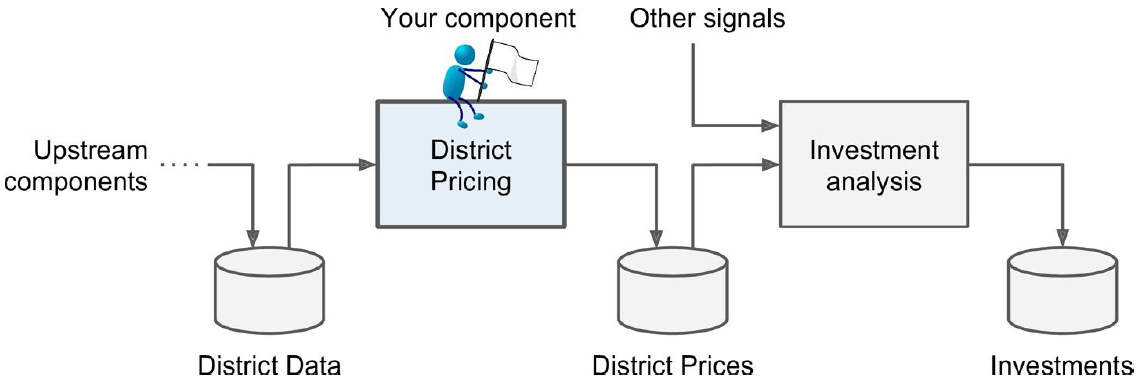


## Next Steps
1. What is the current solution (is there one)?
The district housing prices are currently estimated manually by experts.
A team gathers up-to-date information about a district (excluding median housing prices) and they use complex rules to come up with an estimate. The typical error rate is about 15%.

**Time to start designing the system**
1. Is the problem supervised, unsupervised, or Reinforcement Learning?
It's a typical supervised learning task. We are given labeled training examples (i.e. the district's median housing price).
2. Is it a classification task, a regression task or something else? 
It's a regression task because we need to predict a value. More specifically, it's a multivariate regression problem since the system will use multiple features to make a prediction (district's population, the median income, etc.).
3. Should you use batch or online learning techniques?
There's no continuous flow of data coming in the system, there is no particular need to adjust to changing data rapidly, and the data is small enough to fit in memory. Plain batch learning is fine.



# Select a Performance Measure
## Root Mean Square Error
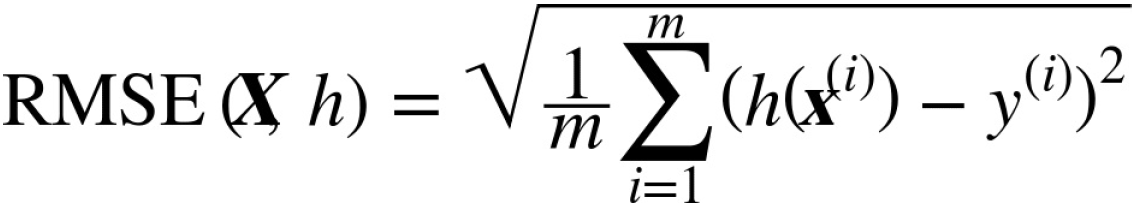

## Mean Absolute Error
In case of many outliers, it's better to use the Mean Absolute Error cost function.
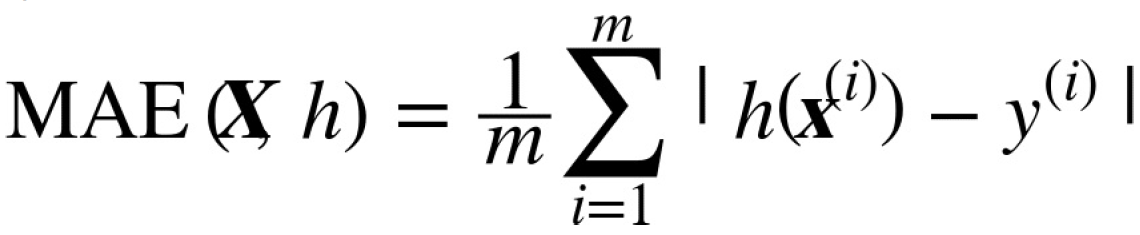


# Check the Assumptions 
List and verify the assumptions that were made so far to catch potential issues. For example, the district prices that your system outputs are going to be fed into a downstream ML system and we assume that these prices are going to be used as such. But what if the downstream system actually converts the prices into categories (e.g., "cheap", "medium" or "expensive") and then uses those categories instead of the prices themselves? 
In this case, getting the price perfectly right is not important at all. If that's so, then the problem should have been framed as a **classification** task, not a **regression** task.
 

# Create the Workspace
We are using Google Colab's built-in workspace as our training environment. 


# Download the Data


In [10]:
!python3 scripts/fetch_data.py

# Load the Data

In [17]:
import pandas as pd
import os

HOUSING_PATH = os.path.join("datasets", "housing")
def load_housing_data(housing_path=HOUSING_PATH):
  csv_path = os.path.join(housing_path, "housing.csv")
  return pd.read_csv(csv_path)

housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [18]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
